<a href="https://colab.research.google.com/github/buttersaltpepper/Financial-Data-Analytics/blob/main/AssetAllocation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Portfolio Management** was one of my favourite course so after learning Python, it was natural to revisit the course material with coding.

This notebook documents my favourite topis from the course, specifically Value at Risk!😀

# **Content:**
## **1. Visualising Why Portfolio Rebalancing is Important**
## **2. The Efficient Frontier**
## **3. Maximum Sharpe and Minimum Volatility Portfolios**
## **4. Visualising Why Asset Allocation is Important**
## **5. Portfolio Risk Models: Value at Risk**


# **Visualising Why Portfolio Rebalancing is Important**
**Using Factor Funds: DVY, MDY, MTUM, QUAL, USMV, VLUE**
* DVY: iShares Select **Dividend** ETF
* MDY: SPDR S&P **MidCap** 400 ETF
* MTM: iShares MSCI USA **Momentum** Factor ETF
* QUAL: VanEck MSCI **International Quality** ETF
* USMV: iShares MSCI USA **Min Vol** Factor ETF
* VLUE: VanEck MSCI **International Value** ETF

In [1]:
! pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20,10)
import pandas as pd
import yfinance as yf

In [3]:
factors_df = yf.download('DVY, MDY, MTUM, QUAL, USMV, VLUE')['Adj Close'].dropna()

[*********************100%***********************]  6 of 6 completed


In [4]:
factors_df.head()

,DVY,MDY,MTUM,QUAL,USMV,VLUE
Date,,,,,,
2013-07-18,49.132179,199.710022,48.403522,43.372173,28.230927,44.043816
2013-07-19,49.219742,199.986084,48.618214,43.034882,28.297642,43.963348
2013-07-22,49.263519,200.662949,48.680820,43.242443,28.305984,44.084061
2013-07-23,49.263519,200.680740,48.600311,43.173237,28.272631,44.084061
2013-07-24,48.884064,199.157852,48.430344,43.112713,28.089140,44.084061


In [56]:
rets = factors_df.pct_change()[1:]
rets = np.array(rets).T
closes = np.array(factors_df).T

## **Plotting rebalanced portfolio**

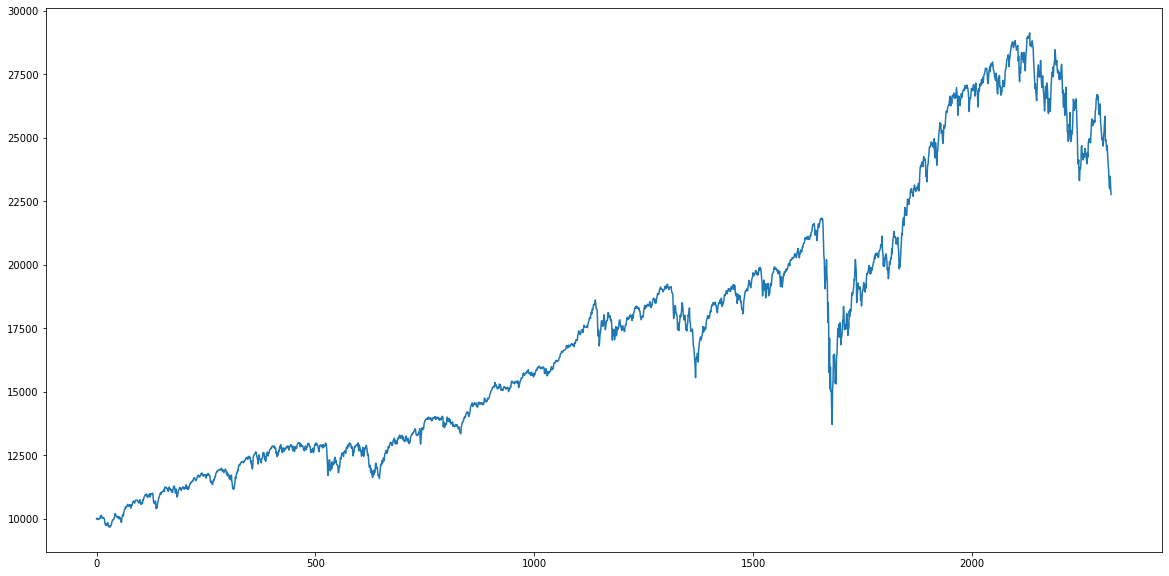

In [57]:
pval = 10000
equal_weights = np.array([1/len(closes)]*len(closes))

plt.plot(np.cumprod(np.dot(equal_weights,rets)+1)*pval)
plt.show()

## **Compared to one-time purchase**
* Simulate a one-time purchase with $10,000

In [63]:
ew_shares = 10000*equal_weights / closes[:,0]
onetime = np.dot(ew_shares,closes)

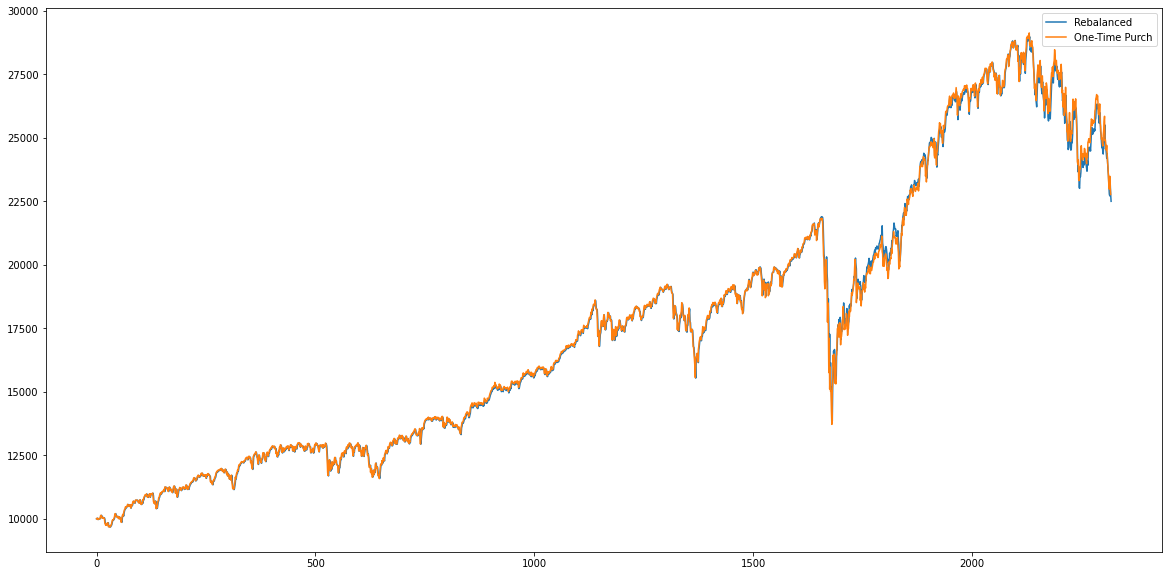

In [64]:
plt.plot(onetime)

plt.plot(np.cumprod(np.dot(equal_weights,rets)+1)*pval)

plt.legend(['Rebalanced', 'One-Time Purch'])
plt.show()

* the space represents divergence between stocks
* Without rebalancing, the portfolio deviates away from a benchmark and the investor becomes exposed to asset risks

**Comparing Final weights**

In [65]:
new_pval = (closes[:,-1]*ew_shares).sum()
final_weights = (closes[:,-1]*ew_shares)/new_pval

pd.DataFrame(equal_weights).T

,0,1,2,3,4,5
0,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667


In [66]:
pd.DataFrame(final_weights).T

,0,1,2,3,4,5
0,0.161649,0.148978,0.200749,0.177515,0.173436,0.137673


**Conclusion**
* Initial Equal Weight was 16.7%.
* Risk Profile changes over time when no balancing is done
* If you have a retirement portfolio plan, you need to rebalance it to avoid deviating away from the plan

# **The Efficient Frontier**
* In modern portfolio theory, the efficient frontier is an investment portfolio which occupies the "efficient" parts of the risk–return spectrum.
* I start off with an equal weighted portfolio and run a Monte Carlo Simulation to create random weighted portfolios to visualise the efficient frontier

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
asset_lists = [
    'BOND.AX', # SPDR S&P/ASX Australian Bond Fund (BOND.AX)
    'AGG', # iShares Core U.S. Aggregate Bond ETF (AGG)
    'XWD.TO', # iShares MSCI World Index ETF (XWD.TO)
    'VAS.AX', # Vanguard Australian Shares Index ETF (VAS.AX)
    'GC=F', # Gold Futures (GC=F)
    'VNQ', # Vanguard Real Estate Index Fund (VNQ)
    # 'CL=F', # Crude Oil Futures
]

assets_df = yf.download(asset_lists)['Close'].dropna()

[*********************100%***********************]  6 of 6 completed


In [16]:
assets_df

,AGG,BOND.AX,GC=F,VAS.AX,VNQ,XWD.TO
Date,,,,,,
2012-07-27,112.290001,24.841700,1617.900024,53.919998,66.529999,23.216433
2012-07-30,112.480003,24.734800,1619.699951,54.450001,66.839996,23.196392
2012-07-31,112.589996,24.761400,1610.500000,54.900002,66.739998,23.086172
2012-08-01,112.239998,24.739300,1603.699951,54.720001,66.419998,23.096191
2012-08-02,112.260002,24.709700,1587.400024,54.779999,66.610001,23.096191
...,...,...,...,...,...,...
2022-09-26,95.949997,23.580000,1623.300049,81.870003,81.099998,60.369999
2022-09-27,95.540001,23.500000,1626.699951,82.089996,80.019997,59.930000
2022-09-28,97.080002,23.440001,1660.400024,81.730003,81.680000,60.849998


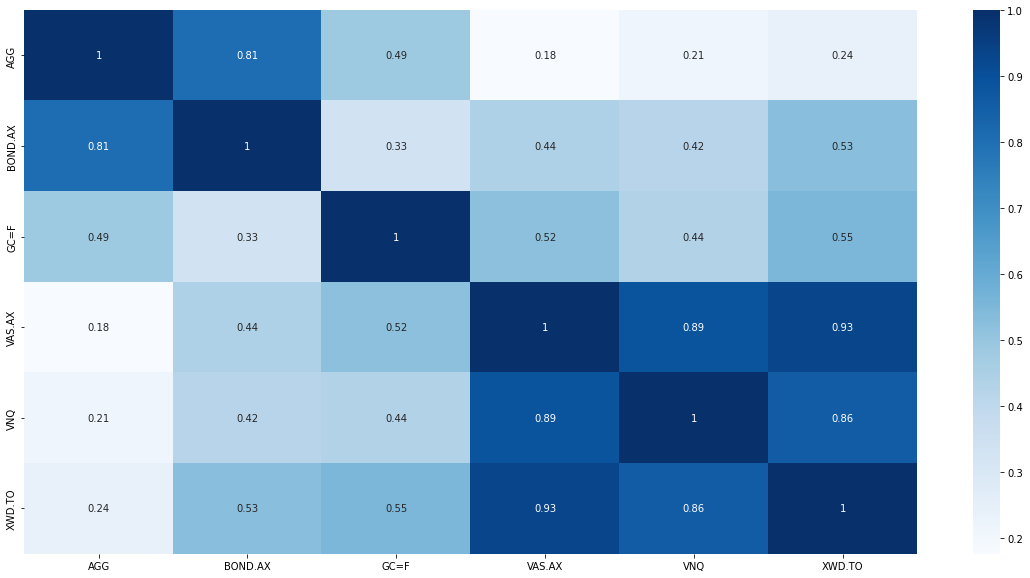

In [17]:
sns.heatmap(assets_df.corr(), annot=True, cmap='Blues');

In [77]:
# returns & covariance matrix
def returnscovmatrix(data):
    returns = np.log(data/data.shift(1))
    mu = returns.mean()
    covmatrix = returns.cov()
    return returns, mu, covmatrix

# annualise performance
def portfolioperformance(weights, mu, cov):
    returns = np.sum(mu * weights * 252)
    std = np.sqrt(np.dot(weights.T, np.dot(cov*252, weights)))
    sr = returns/std
    return returns, std, sr

**Generate equal weighted portfolio**

In [78]:
weights = [1/len(assets_df.columns)]*len(assets_df.columns)
weights /= np.sum(weights)

In [79]:
returns, mu, cov = returnscovmatrix(assets_df)
(mu*252*100).sort_values(ascending=False)

pd.DataFrame(round(mu*252*100,2), columns=['Annual Return (%)'])

,Annual Return (%)
AGG,-1.56
BOND.AX,-0.57
GC=F,0.28
VAS.AX,4.23
VNQ,1.90
XWD.TO,9.67


In [80]:
returns, std, sr = portfolioperformance(weights, mu, cov)

pd.DataFrame([round(returns,2), round(std,2), round(sr,2)], 
             index=['Returns', 'Volatility', 'Sharpe'], columns = ['EW Pf Performance'])

,EW Pf Performance
Returns,0.02
Volatility,0.07
Sharpe,0.31


# **Plotting the Efficient Frontier**

**Simulate portfolios**

In [141]:
n_portfolios = 20000
results = np.zeros((3+len(mu), n_portfolios)) # 3 rows: return, std, sharpe

for i in range(n_portfolios):
    # make random weights
    weights = np.random.rand(len(mu))
    weights /= np.sum(weights)
    
    # Expected return
    portfolio_return = np.sum(mu * weights * 252)
    
    # Expected volatility
    portfolio_stdev = np.sqrt(np.dot(weights.T, np.dot(cov*252, weights)))
    
    # storing to results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_stdev
    results[2,i] = results[0,i] / results[1,i] # sharpe


    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]
        

In [142]:
col_names = [i for i in assets_df.columns]
col_names = ['return', 'stdev', 'sharpe'] + col_names
results_df = pd.DataFrame(results.T, columns=col_names)
results_df.head()

,return,stdev,sharpe,AGG,BOND.AX,GC=F,VAS.AX,VNQ,XWD.TO
0,0.048056,0.094094,0.510725,0.195904,0.050375,0.047256,0.171124,0.099676,0.435666
1,0.021752,0.071427,0.304540,0.216376,0.134154,0.188019,0.156107,0.138505,0.166839
2,0.024045,0.076863,0.312832,0.243841,0.199255,0.072574,0.038753,0.205181,0.240395
3,0.024057,0.081782,0.294159,0.065968,0.270017,0.198552,0.021965,0.228406,0.215092
4,0.023377,0.074819,0.312443,0.149011,0.214354,0.155002,0.103292,0.186185,0.192156


In [143]:
# find Max Sharpe Ratio
max_sharpe = results_df.iloc[results_df.sharpe.idxmax()]

# find Min Vol 
min_vol = results_df.iloc[results_df.stdev.idxmin()]

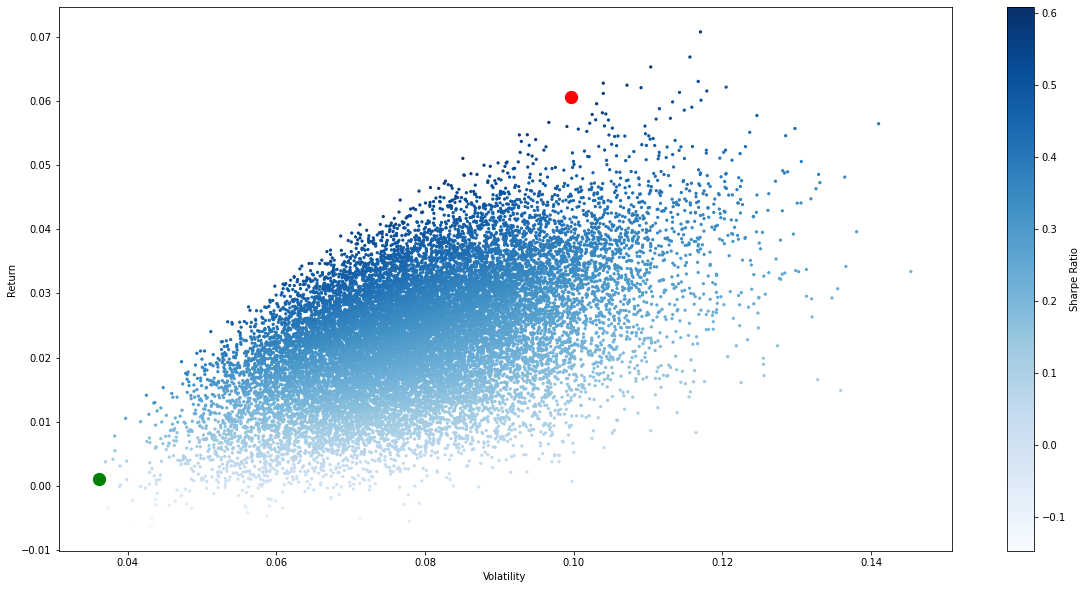

In [144]:
plt.scatter(results_df['stdev'], results_df['return'],c=results_df['sharpe'],cmap='Blues', s=5)

plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.scatter(max_sharpe[1], max_sharpe[0], color='r',s=150)
plt.scatter(min_vol[1],min_vol[0], color='g',s=150)

plt.show()

**Portfolio with max sharpe**

In [145]:
pd.DataFrame(max_sharpe).T

,return,stdev,sharpe,AGG,BOND.AX,GC=F,VAS.AX,VNQ,XWD.TO
6530,0.060606,0.099631,0.6083,0.035094,0.190299,0.05428,0.102722,0.025583,0.592023


**Portfolio with min volatility**

In [146]:
pd.DataFrame(min_vol).T

,return,stdev,sharpe,AGG,BOND.AX,GC=F,VAS.AX,VNQ,XWD.TO
9103,0.001043,0.0362,0.028807,0.425279,0.383767,0.037204,0.061561,0.022372,0.069817


# **Optimising with  Constraints**
**scipy.optimize -> Maximize Sharpe by minimising negative sharpe**

In [147]:
import scipy.optimize as sc
from scipy.optimize import Bounds

# get Returns, Volatility, Sharpe Ratio
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(mu * weights * 252)
    vol = np.sqrt(np.dot(weights.T, np.dot(cov*252, weights)))
    sr = (ret-rf) / vol
    return np.array([ret, vol, sr])

# Get negative sharpe (because minimise negative sharpe = maximising sharpe)
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * -1 # index 2 for Sharpe, also negate it

# Get volatility (will minimise this)
def min_variance(weights):
    return get_ret_vol_sr(weights)[1] # index 1 for volatility # no need to negate as we are minimizing it

# Check if weights = 1
def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1


In [148]:
asset_lists = [
    'BOND.AX', # SPDR S&P/ASX Australian Bond Fund (BOND.AX)
    'AGG', # iShares Core U.S. Aggregate Bond ETF (AGG)
    'XWD.TO', # iShares MSCI World Index ETF (XWD.TO)
    'VAS.AX', # Vanguard Australian Shares Index ETF (VAS.AX)
    'GC=F', # Gold Futures (GC=F)
    'VNQ', # Vanguard Real Estate Index Fund (VNQ)
    # 'CL=F', # Crude Oil Futures
]

assets_df = yf.download(asset_lists)['Close'].dropna()

[*********************100%***********************]  6 of 6 completed


In [149]:
# Define constraints
bounds = ((0,.5),(0,.5),(.1,.8),(.1,.8),(0,.2),(0,.2))

# Define risk free rate
rf = 0

**Define weights, mu, covariance matrix, risk free rate**

In [150]:
# start with equal weight
weights = [1/len(assets_df.columns)]*len(assets_df.columns)
weights /= np.sum(weights)

# Calculate returns, mean returns, covariance matrix
returns, mu, cov = returnscovmatrix(assets_df)

**Run optimisers on Negative Sharpe, and Minimum Volatiltiy**

In [151]:
cons = ({'type':'eq', 'fun':check_sum})
init_guess = weights


opt_sr_results = sc.minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
opt_vol_results = sc.minimize(min_variance, init_guess, method='SLSQP', bounds=bounds, constraints=cons)

### **Maximum Sharpe Portfolio - Aggressive Assets**

In [152]:
pf_sr_results = pd.DataFrame(get_ret_vol_sr(opt_sr_results.x)).T
pf_sr_results.set_axis(['Return', 'Volatility', 'Sharpe'], axis=1, inplace=True)

pf_sr_weights = pd.DataFrame(np.round(opt_sr_results.x,3)).T
pf_sr_weights.set_axis([x for x in assets_df.columns], axis=1, inplace=True)

max_sharpe = pd.concat([pf_sr_results, pf_sr_weights], axis=1)
max_sharpe

,Return,Volatility,Sharpe,AGG,BOND.AX,GC=F,VAS.AX,VNQ,XWD.TO
0,0.027556,0.060505,0.455431,0.0,0.452,0.1,0.248,0.0,0.2


### **Minimum Volatility Portfolio - Defensive Assets**

In [153]:
pf_vol_results = pd.DataFrame(get_ret_vol_sr(opt_vol_results.x)).T
pf_vol_results.set_axis(['Return', 'Volatility', 'Sharpe'], axis=1, inplace=True)

pf_vol_weights = pd.DataFrame(np.round(opt_vol_results.x,3)).T
pf_vol_weights.set_axis([x for x in assets_df.columns], axis=1, inplace=True)

min_vol = pd.concat([pf_vol_results, pf_vol_weights], axis=1)
min_vol

,Return,Volatility,Sharpe,AGG,BOND.AX,GC=F,VAS.AX,VNQ,XWD.TO
0,-0.000119,0.03856,-0.003092,0.363,0.402,0.1,0.1,0.0,0.035


# **Visualising Why Asset Allocation is Important**

In [154]:
including_bm = [
    'BOND.AX', # SPDR S&P/ASX Australian Bond Fund (BOND.AX)
    'AGG', # iShares Core U.S. Aggregate Bond ETF (AGG)
    'XWD.TO', # iShares MSCI World Index ETF (XWD.TO)
    'VAS.AX', # Vanguard Australian Shares Index ETF (VAS.AX)
    'GC=F', # Gold Futures (GC=F)
    'VNQ', # Vanguard Real Estate Index Fund (VNQ)
    '^AXJO', # Benchmark
]

comparison_df = yf.download(including_bm)['Close'].dropna()

[*********************100%***********************]  7 of 7 completed


In [176]:
rets = np.log(comparison_df/comparison_df.shift(1))[1:]
rets['maxSharpe'] = rets.iloc[:,:-1].mul(max_sharpe[['AGG', 'BOND.AX', 'GC=F', 'VAS.AX', 'VNQ', 'XWD.TO']].values).sum(axis=1)
rets['minVol'] = rets.iloc[:,:-2].mul(min_vol[['AGG', 'BOND.AX', 'GC=F', 'VAS.AX', 'VNQ', 'XWD.TO']].values).sum(axis=1)
rets.head()

,AGG,BOND.AX,GC=F,VAS.AX,VNQ,XWD.TO,^AXJO,maxSharpe,minVol
Date,,,,,,,,,
2012-07-30,0.001691,-0.004313,0.001112,0.009781,0.004649,-0.000864,0.008492,0.000415,-0.000061
2012-07-31,0.000977,0.001075,-0.005696,0.008231,-0.001497,-0.004763,0.005520,0.001005,0.000874
2012-08-01,-0.003113,-0.000893,-0.004231,-0.003284,-0.004806,0.000434,-0.001500,-0.001554,-0.002225
2012-08-02,0.000178,-0.001197,-0.010216,0.001096,0.002857,0.000000,0.001571,-0.001291,-0.001329
2012-08-03,-0.002408,0.001743,0.011649,-0.013046,0.007776,0.009499,-0.011306,0.000617,0.000019


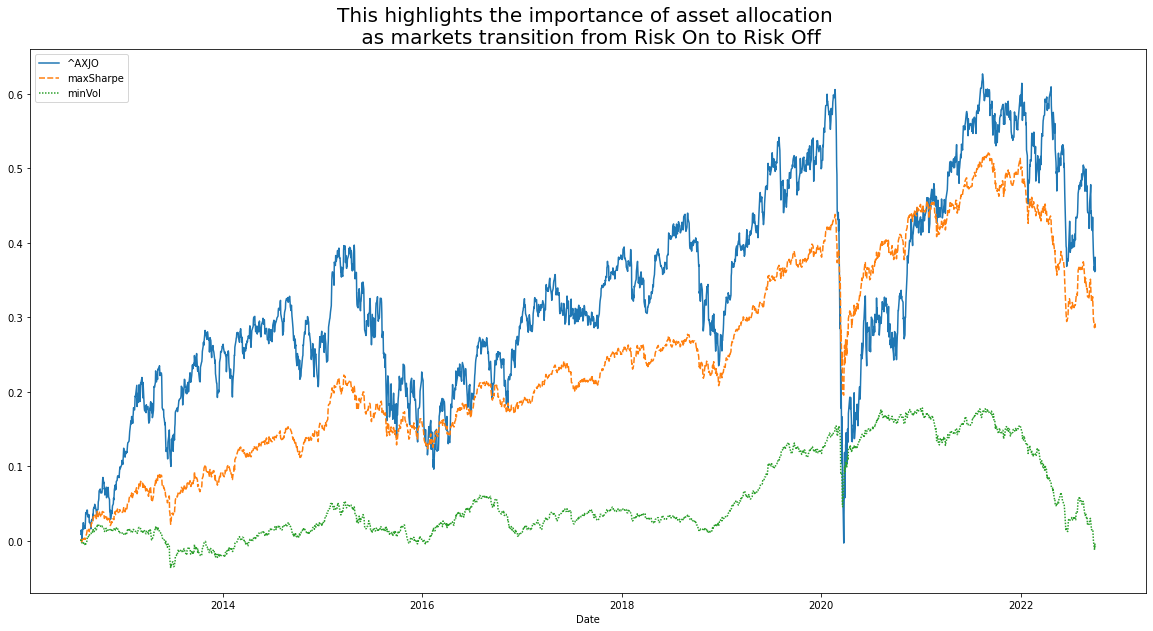

In [190]:
pf_performances = rets[['^AXJO', 'maxSharpe','minVol']]
sns.lineplot(data=(1+pf_performances).cumprod()-1)
plt.title('This highlights the importance of asset allocation \n as markets transition from Risk On to Risk Off', fontsize=20)

plt.show()

# **Portfolio Risk Management: Value at Risk**
* Once the direction or asset class has been decided, it is always good to look look at the quantitative risk models.
* Value at Risk is the simples and most intuitive model to understand the risk exposure of the portfolio

# **4 types of VaR**🔥
* **VaR** - use historical data
* **Parametric VaR** - use assumptions
* **CVaR** - distribution of losses
* **Monte Carlo** - forward looking

In [35]:
import seaborn as sns

## 1. Historical Drawdown

In [36]:
# returns & covariance matrix
def returnscovmatrix(data):
    returns = np.log(data/data.shift(1))
    mu = returns.mean()
    covmatrix = returns.cov()
    return returns, mu, covmatrix

# annualise performance
def portfolioperformance(weights, mu, cov):
    returns = np.sum(mu * weights * 252)
    std = np.sqrt(np.dot(weights.T, np.dot(cov*252, weights)))
    sr = returns/std
    return returns, std, sr

In [37]:
assets_df.head()

,AGG,BTC-USD,GLD,IJR,IVV,IYR,USO
Date,,,,,,,
2014-09-17,89.697594,457.334015,117.540001,48.441837,173.461349,54.247066,280.079987
2014-09-18,89.705879,424.440002,117.779999,48.735390,174.371353,53.852165,276.959991
2014-09-19,89.854668,394.795990,117.089996,48.130486,174.165283,53.882542,276.559998
2014-09-22,89.978714,402.152008,116.849998,47.618984,172.894653,53.404095,273.519989
2014-09-23,90.061356,435.790985,117.599998,47.143051,171.941772,53.100300,275.519989


In [38]:
opt_sr_results.x

array([1.05085694e-01, 2.19803028e-01, 2.90899470e-01, 0.00000000e+00,
       3.84211807e-01, 0.00000000e+00, 1.86699614e-16])

In [39]:
pf_weights = np.array([.55,.45])

In [40]:
returns, mu, covmatrix = returnscovmatrix(assets_df)
returns = returns.dropna()
weights = opt_sr_results.x

returns['portfolio'] = returns.dot(weights)
returns['cum_ret'] = (1+returns.portfolio).cumprod()-1
returns.head()

,AGG,BTC-USD,GLD,IJR,IVV,IYR,USO,portfolio,cum_ret
Date,,,,,,,,,
2014-09-18,0.000092,-0.074643,0.002040,0.006042,0.005232,-0.007306,-0.011202,-0.013793,-0.013793
2014-09-19,0.001657,-0.072402,-0.005876,-0.012490,-0.001182,0.000564,-0.001445,-0.017903,-0.031450
2014-09-22,0.001380,0.018461,-0.002052,-0.010684,-0.007322,-0.008919,-0.011053,0.000793,-0.030682
2014-09-23,0.000918,0.080333,0.006398,-0.010045,-0.005527,-0.005705,0.007285,0.017492,-0.013727
2014-09-24,-0.000643,-0.029306,-0.004688,0.007936,0.007715,-0.001011,0.016129,-0.004909,-0.018569


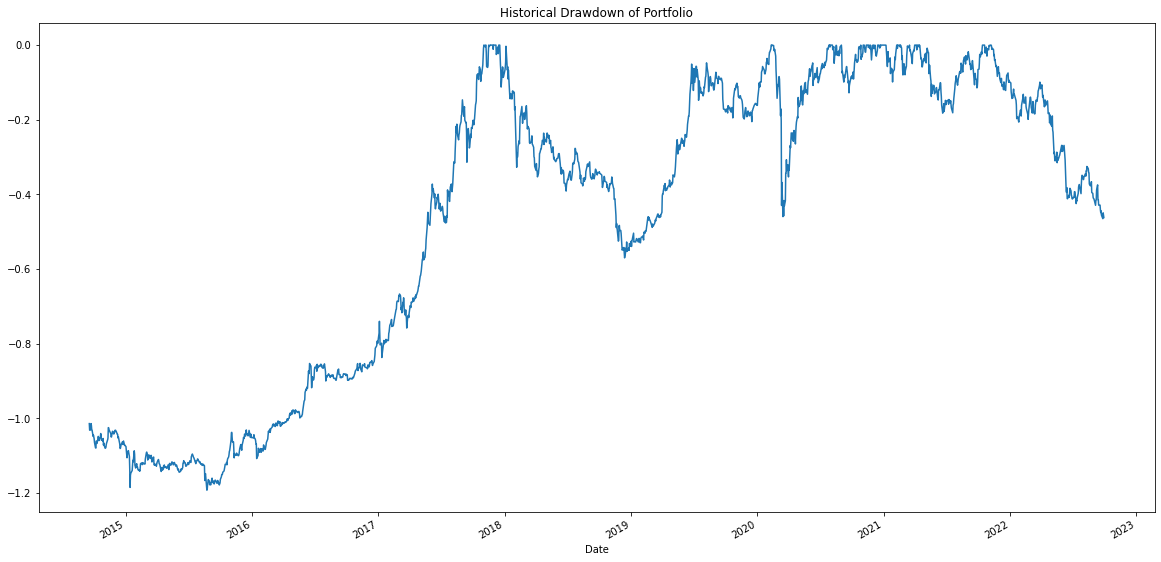

In [41]:
# Calculate the running maximum
running_max = np.maximum.accumulate(returns.cum_ret)

# Ensure the value never drops below 1
running_max[running_max < 1] = 1

# Calculate the percentage drawdown
drawdown = (returns.cum_ret)/running_max - 1

# Plot the results
drawdown.plot()
plt.title('Historical Drawdown of Portfolio')
plt.show()

# 2. Historical Value at Risk
* assumes distribution of historical lsoses will be the same in future

In [42]:
alpha = 5

In [43]:
hist_var = np.percentile(returns.portfolio, alpha)
print('historical VaR: {:.2%}'.format(hist_var))

historical VaR: -1.88%


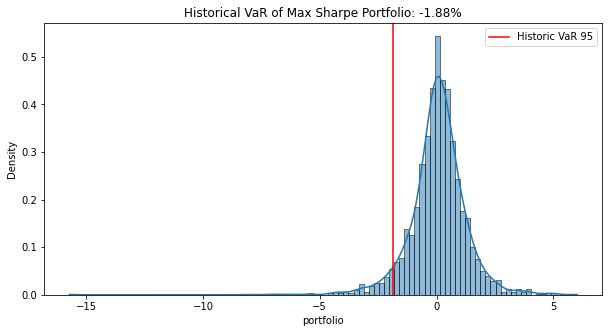

In [44]:
plt.figure(figsize=(10,5))

sns.histplot(returns.portfolio*100, stat='density',kde=True,bins=100)
plt.axvline(x=hist_var*100, color='r', label='Historic VaR 95')
plt.legend()
plt.title('Historical VaR of Max Sharpe Portfolio: {:.2%}'.format(hist_var))
plt.show()

# 3. Historical Expected Shortfall (CVaR, or Conditional VaR)
* or the expected loss, given losses, the average of losses

In [45]:
# Slice losses
cvar = returns.portfolio[returns.portfolio <= hist_var].mean()
print('Expected loss: {:.2%}'.format(cvar))

Expected loss: -3.02%


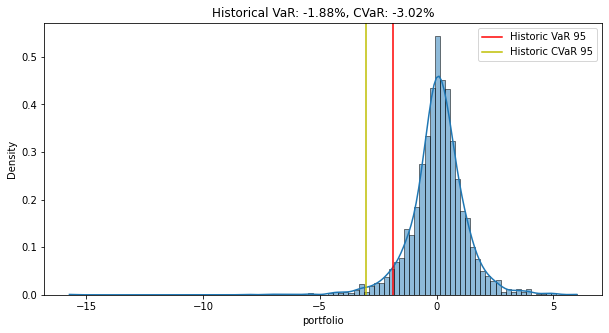

In [46]:
plt.figure(figsize=(10,5))

sns.histplot(returns.portfolio*100, stat='density',kde=True,bins=100)
plt.axvline(x=hist_var*100, color='r', label='Historic VaR 95')
plt.axvline(x=cvar*100, color='y', label='Historic CVaR 95')
plt.legend()
plt.title(f"Historical VaR: {round(hist_var*100,2)}%, CVaR: {round(cvar*100,2)}%")
plt.show()

# 4. Parametric VaR
**Parametric VaR**
* Describes a distribution based our estimated mean and volatility of portfolio.
* Then finds var from that distributino
* Value at Risk computed parametrically uses a method known as variance/co-variance VaR. 
* This method simulate a range of possibilities based on historical return distribution properties rather than actual return values.

**Calculate Parametric VaR**
* **norm.ppf(confidence_level=0.10, mu, vol)**
where mu and vol are the mean and volatility, respectively.

In [47]:
# import norm from scipy.stats
from scipy.stats import norm

In [48]:
# estimate average daily returns
mu = np.mean(returns.portfolio) 
# estimate daily volatility
vol = np.std(returns.portfolio)

In [49]:
# set confidence level
confidence_level = 0.05

# Calculate Parametric VaR
pVaR = norm.ppf(confidence_level, mu, vol)
print('Parametric VaR: {:.2%}'.format(pVaR))

Parametric VaR: -1.99%


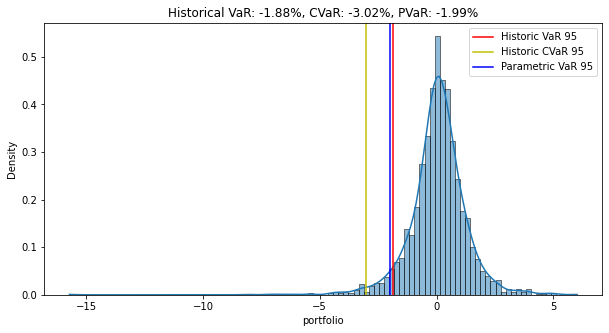

In [50]:
plt.figure(figsize=(10,5))


sns.histplot(returns.portfolio*100, stat='density',kde=True,bins=100)
plt.axvline(x=hist_var*100, color='r', label='Historic VaR 95')
plt.axvline(x=cvar*100, color='y', label='Historic CVaR 95')
plt.axvline(x=pVaR*100, color='b', label='Parametric VaR 95')
plt.legend()
plt.title(f"Historical VaR: {round(hist_var*100,2)}%, CVaR: {round(cvar*100,2)}%, PVaR: {round(pVaR*100,2)}%")
plt.show()

# 5. Visualising VaR over time
Previous VaR looks at risk for a single time (in this case, t = day)

**To scale VaR:**
$VaR(95)t = VaR(95)t * \sqrt{t}$ 

In [51]:
hist_var, cvar, pVaR

(-0.0188126944282503, -0.030242866953465578, -0.019864316413437832)

In [52]:
scaled_vars = np.empty([100,2])

for i in range(0, 100):
    scaled_vars[i,0] = i
    scaled_vars[i,1] = -hist_var*100*np.sqrt(i)

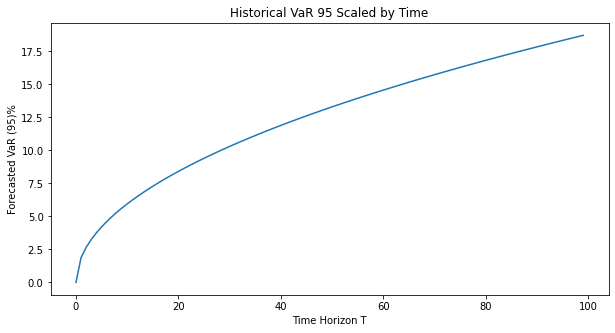

In [53]:
plt.figure(figsize=(10,5))

plt.plot(scaled_vars[:,0], scaled_vars[:,1])
plt.title('Historical VaR 95 Scaled by Time')
plt.ylabel('Forecasted VaR (95)%')
plt.xlabel('Time Horizon T')
plt.show()

# 6. Monte Carlo Simulating VaR and CVaR
* Stochastic or random movements in mathematics to describe fractal behavior, and in finance to describe stock market movements.
* Aggregate the returns data at each iteration
* Use the resulting values to forecast parametric VaR(95).
* **np.random.normal()** function is used to model random walk movements of the portfolio

In [54]:
# estimate average daily returns
mu = np.mean(returns.portfolio) 
# estimate daily volatility
vol = np.std(returns.portfolio)
T = 252

In [55]:
# Aggregate the returns
sim_returns = []

# Loop through 10000 simulations
for i in range(10000):

    # Generate the Random Walk
    rand_rets = np.random.normal(mu, vol, T)
    # Store results
    sim_returns.append(rand_rets)

mc_var = np.percentile(sim_returns, 5)
print("Parametric VaR(95): ", round(100*mc_var, 2),"%")

Parametric VaR(95):  -1.99 %
